<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/02_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With TensorFlow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### Create Data

* This data will be used to train the neural network

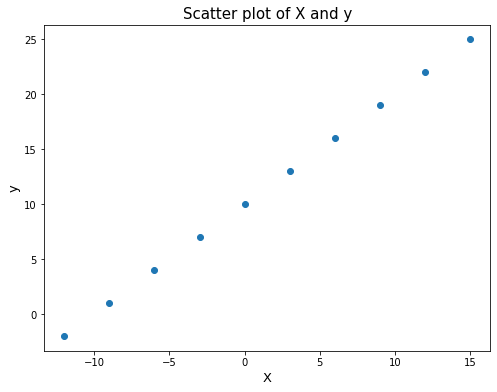

In [2]:
X = np.array([[-12, -9, -6, -3, 0, 3, 6, 9, 12, 15]]) # Row Matrix
y = np.array([-2, 1, 4, 7, 10, 13, 16, 19, 22, 25])


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter plot of X and y", size=15)
plt.show()

In [3]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [4]:
# Convert the NumPy arrays to Tensors
# Cast and reshape X
X = tf.cast(tf.constant(X), dtype=tf.float16)
X = tf.reshape(X, shape=(-1, 1))
y = tf.cast(tf.constant(y), dtype=tf.float16)

X.shape, y.shape

(TensorShape([10, 1]), TensorShape([10]))

### Steps In Modelling With TensorFlow

1. **Create a model**: define the `input`, `hidden` and `output` layers of the deep learning model.
2. **Compile the model**: define the `loss function` (i.e the function that tells our model how wrong it is), the `optimizer` (it tells our model how to improve the patterns its learning) and the `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fit the model**: the model `learns` the `patterns` between the input and the output

#### Create a baseline model


### Some Key Terms

* **Loss**: How wrong the model predictions are (you want to minimize this)
* **Optimizer**: It tells the model how it should update it's parameters to imporeve its predictions.
* **Metrics**: Human interpretable values for how well the model is performing.
* **Epocs**: This represents the number of times the model will go thru all the training examples.
* **Evaluation** (on unseen data): This tells us how reliable the our model predictions are on unseen data.

In [5]:
# Set seed for reproducibility
SEED = 123
tf.random.set_seed(SEED)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None) # The model has a single neuron

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE: Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # OR 'sgd'
              metrics = ["mae"] # OR tf.keras.losses.mae
              )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 830ms/step - loss: 22.4785 - mae: 22.4785
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 22.0008 - mae: 22.0008
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 21.5231 - mae: 21.5231
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 21.0454 - mae: 21.0454
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 20.5677 - mae: 20.5677


In [6]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
 array([[-12.],
        [ -9.],
        [ -6.],
        [ -3.],
        [  0.],
        [  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]], dtype=float16)>,
 <tf.Tensor: shape=(10,), dtype=float16, numpy=array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25.], dtype=float16)>)

In [7]:
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 219ms/step


array([[-23.974812]], dtype=float32)

In [8]:
# Since the mae is ~11 on average, let's add 11 to the predicted value
y_pred + 11

array([[-12.974812]], dtype=float32)

### Improve The Model

> We can improve the model by altering the steps taken to create the model.

1. **Create model**: We might:
  * Add more layers
  * increase the number of hidden units(neurons)
  * change the activation function

2. **Compile model**: We might:
  * change the optimization function
  * change the learning rate

3. **Fit the model**: We might:
  * increase the number of epochs
  * increase the training data

In [9]:
# Rebuild the model by increasing the number of epochs
tf.random.set_seed(SEED)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 675ms/step - loss: 12.3435 - mae: 12.3435
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 12.1132 - mae: 12.1132
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 11.9547 - mae: 11.9547
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7962 - mae: 11.7962
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6377 - mae: 11.6377
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.4792 - mae: 11.4792
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3207 - mae: 11.3207
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1789 - mae: 11.1789
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1464 - mae: 11.1464
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1139 - mae: 11.1139
Epoch 11/100
1/1 [==============================

In [10]:
# Make predictions
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 98ms/step


array([[29.299723]], dtype=float32)

#### Tweak The Model

* Experiment by changing the `hyperparameters`.
* Add a new layer.

In [11]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation="ReLU"),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

# Fit model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 882ms/step - loss: 11.5538 - mae: 11.5538
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2469 - mae: 11.2469
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 10.9358 - mae: 10.9358
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6185 - mae: 10.6185
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.3154 - mae: 10.3154
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 9.9807 - mae: 9.9807
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6329 - mae: 9.6329
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2877 - mae: 9.2877
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9009 - mae: 8.9009
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.5043 - mae: 8.5043
Epoch 11/100
1/1 [==============================] - 0s 10ms/s

In [12]:
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 165ms/step


array([[33.47327]], dtype=float32)

### Try Using A Different Optimizer

* e.g. Adam

In [13]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.Dense(units=1),
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.9443 - mae: 12.9443
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.9648 - mae: 11.9648
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2028 - mae: 11.2028
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7400 - mae: 10.7400
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4043 - mae: 10.4043
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0802 - mae: 10.0802
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7617 - mae: 9.7617
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4448 - mae: 9.4448
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1264 - mae: 9.1264
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.8041 - mae: 8.8041
Epoch 11/100
1/1 [==============================] - 0s 8ms/step 

In [14]:
# Make predictions
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 113ms/step


array([[27.187956]], dtype=float32)

### Evaluate The Model Performance

* It's a good idea to `visualize`.
* We can visualize the following:

  1. Data.
  2. Model.
  3. Model training.
  4. The model predictions.

In [15]:
# Create a bigger data
X = tf.cast(tf.range(-100, 100, 4), dtype=tf.float16)
y = X + 10


# Turn it into a matrix
X = tf.expand_dims(X, axis=-1)


tf.size(X).numpy()

50

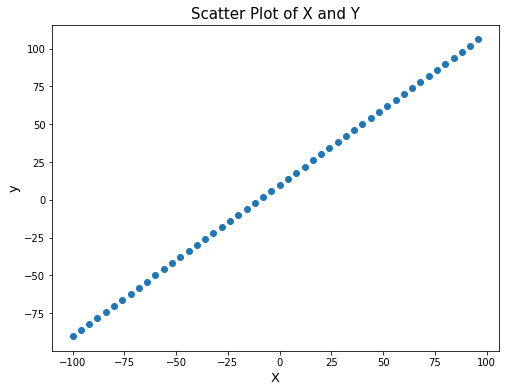

In [16]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)

plt.show()

In [17]:
0.8 * X.shape[0]

40.0

In [18]:
# Split the data
X_train, X_val = X[:40], X[40:]
y_train, y_val = y[:40], y[40:]

X_train.shape, X_val.shape

(TensorShape([40, 1]), TensorShape([10, 1]))

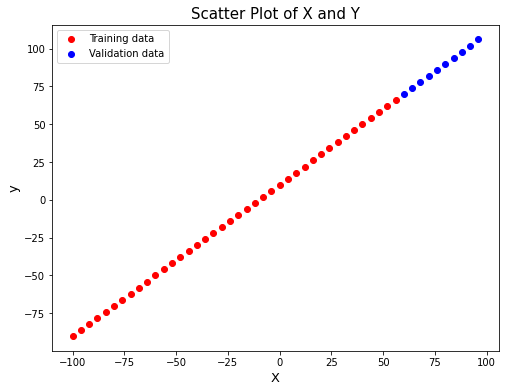

In [19]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color="red", label="Training data")
plt.scatter(X_val, y_val, color="blue", label="Validation data")
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)
plt.legend()

plt.show()

### Visualize The Data Split

In [20]:
# from sklearn.model_selection import train_test_split



# RANDOM_STATE, TEST_SIZE = 123, 0.2

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
# X_train.shape, X_val.shape

In [58]:
# Build model (with input shape)
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=None, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer"),
], name="neural_net_1")

# Compile 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])



In [59]:
# Model Summary
model.summary()

Model: "neural_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Some Key Terms
* **Total params**: total number of parameters the model needs to learn.
* **Trainable params**: these are the parameters (patterns) that the model can update as it trains.
* **Non-trainable params**: these parameters are not updated during training. this is typical when you use already learned parameters from other models during training (i.e transfer learning)

In [60]:
# Fit 
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 23.8214 - mae: 23.8214
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0383 - mae: 19.0383
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 27.0192 - mae: 27.0192
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 19.6952 - mae: 19.6952
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 21.3764 - mae: 21.3764
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 15.8236 - mae: 15.8236
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 18.1372 - mae: 18.1372
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 15.6818 - mae: 15.6818
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 15.2766 - mae: 15.2766
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 16.5926 - mae: 16.5926
Epoch 11/100
2/2 [==============================] - 0s 6ms

### Visualize The Model

[![image.png](https://i.postimg.cc/XJnBMPTk/image.png)](https://postimg.cc/Lq08Lx4J)

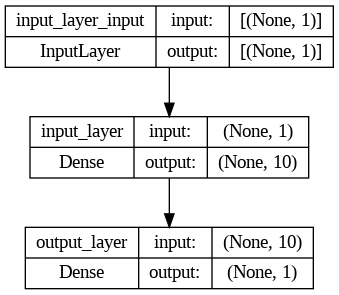

In [61]:
from tensorflow.keras.utils import plot_model


plot_model(model, show_shapes=True)

In [25]:
def plot_prediction(X_train=X_train, 
                    X_val=X_val, 
                    y_train=y_train, 
                    y_val=y_val, 
                    y_predictions=y_pred) -> "Plot":
  """This is used to visualize the model predictions.

  Params:
    X_train (tf.tensor): The training data.
    X_val (tf.tensor): The validation data.
    y_train (tf.tensor): The labels of the training data.
    y_train (tf.tensor): The labels of the validation data.
    y_pred (tf.tensor): The predicted data.

  Returns:
    None
  """
  # Visualize the data
  plt.figure(figsize=(8, 6))

  plt.scatter(X_train, y_train, color="red", label="Training data")
  plt.scatter(X_val, y_val, color="blue", label="Validation data")
  plt.scatter(X_val, y_predictions, color="green", label="Predicted data")
  plt.xlabel("X", size=13)
  plt.ylabel("y", size=13)
  plt.title("Scatter Plot of X and Y", size=15)
  plt.legend()

  plt.show()

In [57]:
# Make predictions
y_pred = model.predict(X_val)

1/1 [==============================] - 0s 18ms/step


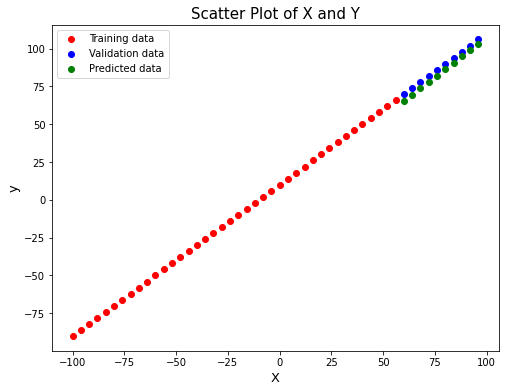

In [27]:
plot_prediction(y_predictions=y_pred)

In [62]:
# Evaluate
model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 105ms/step - loss: 3.6094 - mae: 3.6094


[3.6094276905059814, 3.6094276905059814]

### Challenge

> Implement the following:

1. Mean Absolute Error

```python
tf.keras.losses.MAE()

# OR
tf.metrics.mean_absolute_error()
```

$$
mae = \frac{\sum^n_{i=1}{|y_{i}} - \hat{y}_{i}|}{n}
$$

2. Mean Squared Error

```python
tf.keras.losses.MSE()

# OR
tf.metrics.mean_squared_error()
```

$$
mse = \frac{\sum^n_{i=1}{(y_{i}} - \hat{y}_{i})^2}{n}
$$

In [80]:
def mean_absolute_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Absolute Error."""
  mae = tf.math.reduce_mean(tf.math.abs(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mae


def mean_squared_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Squared Error."""
  mse = tf.math.reduce_mean(tf.math.square(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mse



In [81]:
print(mean_absolute_error(y_true=y_val, y_pred=y_pred))

mean_squared_error(y_true=y_val, y_pred=y_pred)

tf.Tensor(3.781, shape=(), dtype=float16)


<tf.Tensor: shape=(), dtype=float16, numpy=14.75>

In [66]:
# OR
tf.keras.losses.MAE(y_true=y_val, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.7822127>

In [82]:
# Mean Squared Error
tf.keras.losses.MSE(y_true=y_val, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=14.763547>